# Decision Tree

### entrophy 값 계산

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data.drop("RID",axis=1)
pd_data

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [3]:
buy = pd_data.loc[pd_data['class_buys_computer'] == "yes"]
not_buy = pd_data.loc[pd_data['class_buys_computer'] == "no"]

x = np.array([len(buy)/len(pd_data),len(not_buy)/len(pd_data)])
y = np.log2(x)

info_all = - sum(x * y)
info_all

0.9402859586706311

In [5]:
# 전체 데이터의 entrophy
def get_info(df):
    buy = df.loc[df["class_buys_computer"]=="yes"]
    not_buy = df.loc[df["class_buys_computer"]=="no"]
    x = np.array([len(buy)/len(df),len(not_buy)/len(df)])
    y = np.log2(x[x!=0])
    

    info_all = - sum(x[x!=0] * y)
    return info_all

In [6]:
# 해당 feature로 했을 때 나오는 평균 entrophy
def get_attribute_info(df, attribute_name):
    attribute_values = pd_data[attribute_name].unique()
    get_infos = []
    for value in attribute_values:
        split_df = pd_data.loc[pd_data[attribute_name] == value]
        
        get_infos.append((len(split_df) / len(df)) * get_info(split_df))
    
    return sum(get_infos)

In [7]:
# 큰 값을 우선적으로 split
get_info(pd_data) - get_attribute_info(pd_data, "age")

0.24674981977443933

## Decision Tree with Sklearn

## skelarn.DecisionTreeClssifier
- creterion : 어떤 알고리즘을 쓸 것인가 (default는 gini, )

하이퍼패러미터로써 찾아가는 과적합 방지 파라미터
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

### 타이타닉 데이터 DT

In [8]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [13]:
train_id = train_df["PassengerId"].values
test_id = test_df["PassengerId"].values


all_df =train_df.append(test_df).set_index('PassengerId')
all_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


> 전처리

In [15]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [18]:
all_df["Age"].fillna(
    all_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

all_df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [19]:
all_df["cabin_count"] = all_df["Cabin"].map(lambda x : len(x.split()) if type(x) == str else 0)
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs" 
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

In [22]:
all_df["social_status"] = all_df["Name"].map(lambda x : transform_status(x))

In [23]:
all_df.iloc[train_id-1].isnull().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
cabin_count        0
social_status      0
dtype: int64

In [24]:
all_df[all_df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1,Miss
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1,Mrs


In [25]:
all_df =all_df.drop([62,830])

In [26]:
import numpy as np 

train_id = np.delete(train_id, [62-1,830-1])

In [27]:
all_df.groupby(["Pclass","Sex"])["Fare"].mean()

Pclass  Sex
1       0       69.888385
        1      109.826644
2       0       19.904946
        1       23.234827
3       0       12.415462
        1       15.324250
Name: Fare, dtype: float64

In [28]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 12.415462


In [29]:
all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "99")

In [30]:
del all_df["Cabin"]
del all_df["Name"]
del all_df["Ticket"]

In [32]:
y = all_df.loc[train_id, "Survived"].values
y[:100]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

In [33]:
len(y), len(train_id)

(889, 889)

In [35]:
del all_df["Survived"]

### OneHot Encoding

In [36]:
X_df = pd.get_dummies(all_df)
X_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,cabin_count,Embarked_C,Embarked_Q,Embarked_S,...,social_status_Rev,cabin_type_99,cabin_type_A,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1,26.0,0,0,7.9250,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,1,35.0,1,0,53.1000,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,3,0,35.0,0,0,8.0500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [37]:
X = X_df.values

In [38]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X)
X = minmax_scaler.transform(X)

In [39]:
X_train = X[:len(train_id)]
X_test = X[len(train_id):]

In [40]:
len(X_train), len(y)

(889, 889)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [42]:
algorithmes = [LogisticRegression(), DecisionTreeClassifier()]

In [43]:
c_params = [0.1,  5.0, 7.0, 10.0, 15.0, 20.0, 100.0]


params = []
params.append([{
    "solver" : ["saga"],
    "penalty" : ["l1"],
    "C" : c_params
    },{
    "solver" : ['liblinear'],
    "penalty" : ["l2"],
    "C" : c_params
    }
    ])
params.append({
    "criterion" : ["gini", "entropy"],
    "max_depth" : [10,8,7,6,5,4,3,2],
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9]})

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

scoring = ['accuracy']
estimator_results = []
for i, (estimator, params) in enumerate(zip(algorithmes,params)):
    gs_estimator = GridSearchCV(
            refit="accuracy", estimator=estimator,param_grid=params, scoring=scoring, cv=5, verbose=1, n_jobs=4)
    print(gs_estimator)

    gs_estimator.fit(X_train, y)
    estimator_results.append(gs_estimator)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid=[{'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
                          'penalty': ['l1'], 'solver': ['saga']},
                         {'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
                          'penalty': ['l2'], 'solver': ['liblinear']}],
             refit='accuracy', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/Caskroom/miniconda/base/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 8, 7, 6, 5, 4, 3, 2],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             refit='accuracy', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [45]:
estimator_results[0].best_score_, estimator_results[1].best_score_

(0.8268075922046594, 0.8358154002412238)

In [46]:
import pandas as pd
from pandas import DataFrame
from collections import defaultdict

result_df_dict = {}

result_attributes = ["model", "accuracy", "penalty", "solver", "C", "criterion", "max_depth", "min_samples_leaf"]
result_dict = defaultdict(list)

algorithm_name= ["LogisticRegression", "DecisionTreeClassifier"]

for i, estimators in enumerate(estimator_results):
    number_of_estimators = len(estimators.cv_results_["mean_fit_time"])

    for idx_estimator in range(number_of_estimators):
        result_dict["model"].append(algorithm_name[i])
        result_dict["accuracy"].append(
            estimators.cv_results_["mean_test_accuracy"][idx_estimator])
            
    for param_value in estimators.cv_results_["params"]:
        for k,v in param_value.items():
            result_dict[k].append(v)
    for attr_name in result_attributes:
        if len(result_dict[attr_name]) < len(result_dict["accuracy"]):
            result_dict[attr_name].extend([None for i in range(number_of_estimators)])

In [47]:
result_df = DataFrame(result_dict, columns=result_attributes)
result_df.sort_values("accuracy",ascending=False).head(n=100)

,model,accuracy,penalty,solver,C,criterion,max_depth,min_samples_leaf
137,DecisionTreeClassifier,0.835815,None,None,NaN,entropy,4.0,7.0
136,DecisionTreeClassifier,0.834692,None,None,NaN,entropy,4.0,6.0
135,DecisionTreeClassifier,0.834692,None,None,NaN,entropy,4.0,5.0
139,DecisionTreeClassifier,0.834679,None,None,NaN,entropy,4.0,9.0
138,DecisionTreeClassifier,0.833556,None,None,NaN,entropy,4.0,8.0
...,...,...,...,...,...,...,...,...
140,DecisionTreeClassifier,0.811052,None,None,NaN,entropy,3.0,1.0
148,DecisionTreeClassifier,0.811052,None,None,NaN,entropy,3.0,9.0
55,DecisionTreeClassifier,0.809947,None,None,NaN,gini,5.0,6.0
17,DecisionTreeClassifier,0.809941,None,None,NaN,gini,10.0,4.0


In [48]:
estimator_results[1].best_estimator_.feature_importances_ # 어떤 feature가 중요하게 작용했는가

array([0.13376524, 0.06257368, 0.08742618, 0.        , 0.        ,
       0.18883257, 0.01350244, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5138999 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [49]:
X_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

In [50]:
estimator_results[0].best_estimator_.coef_

array([[-1.73402058,  2.2487144 , -2.19185179, -3.65078909, -2.41066593,
         1.27767698, -0.45084819,  0.5059603 ,  0.34796533,  0.07057545,
        -0.60628348,  0.33768235, -0.06522342,  2.5056543 ,  0.07097909,
        -0.57552066,  0.75801617, -1.50080327, -0.41747772,  0.16045469,
         0.32518849, -0.10809994,  0.84396807,  1.13125027,  0.53153585,
        -0.73318799, -0.80913064]])

> pydot을 이용하여 결정 트리를 출력한다

In [51]:
best_tree = estimator_results[1].best_estimator_
column_names=  pd.get_dummies(all_df).columns

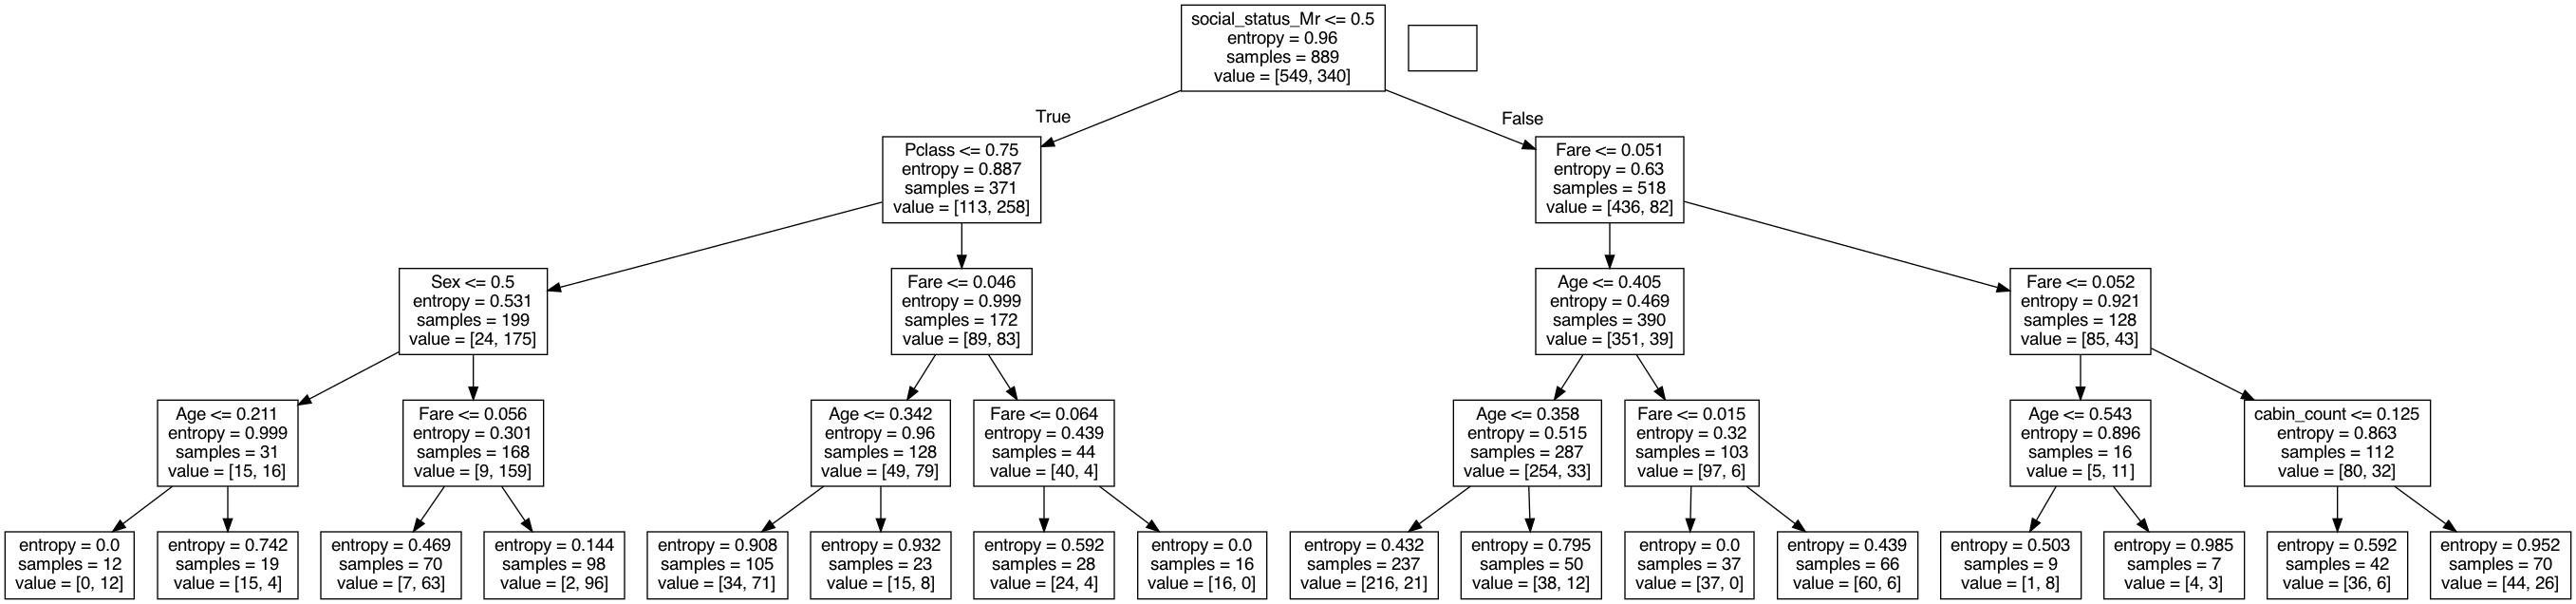

In [62]:
import pydotplus
from six import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz

dot_data = StringIO()
tree.export_graphviz(best_tree, out_file=dot_data, feature_names=column_names) 

graph = pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("titanic.png")

from IPython.core.display import Image 
Image(filename='titanic.png')